<a href="https://colab.research.google.com/github/zup-academy/poc-qualidade-software/blob/master/pocQualidadeSoftwareReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zup.Edu Research - Auditoria/Análise de Projetos

**Projeto Auditado:** handora-plano-de-estudos-main

* Repositório: https://github.com/zup-academy/handora-plano-de-estudos
* Tamanho: 892KB
* Contém: 202 arquivos (98.2% .java), 74 pastas

Nesse colab, apresentamos os resultados de um conjunto de análises feitas no repositório `handora-plano-de-estudos`. As análises estão listadas a seguir:

*   Análise de arquitetura:
*   Análise de design de código:
*   Análise de Implementação:
*   Análise de design de teste:
*   Análise de design de testabilidade:

Ainda são exibidas algumas métricas relacionadas as classes e métodos do projeto, como:

## Configurações e Imports de Biliotecas e Dados para as Análises

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
import os, json

from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/Shareddrives/Zup EDU/05. Pesquisa/37.MVP-de-codigo/Qualidade de Código/handora-plano"

Mounted at /content/drive


In [ ]:
#Explicar aquivo....
architectureDf = pd.read_csv(path+"/ArchitectureSmells.csv")

#Explicar aquivo....
# Especifiquei as colunas aqui para ele não se perder nos separadores que estão sendo utilizados
col_names = ["Project Name","Package Name","Type Name","Design Smell","Cause of the Smell"]
designDf = pd.read_csv(path+"/DesignSmells.csv", names=col_names)

#Explicar aquivo....
implementationDf = pd.read_csv(path+"/ImplementationSmells.csv")

#Explicar aquivo....
methodMetricsDf = pd.read_csv(path+"/MethodMetrics.csv")

#Explicar aquivo....
testabilityDf = pd.read_csv(path+"/TestabilitySmells.csv")

#Explicar aquivo....
testDf = pd.read_csv(path+"/TestSmells.csv")

#Explicar aquivo....
typeMetricsDf = pd.read_csv(path+"/TypeMetrics.csv")

Esses arquivos foram gerados a partir do uso da ferramenta Designite....

## Pré-processamento dos Dados

In [ ]:
# Eliminando duplicados, se existirem
architectureDf = architectureDf.drop_duplicates()
designDf = designDf.drop_duplicates()
implementationDf = implementationDf.drop_duplicates()
testabilityDf = testabilityDf.drop_duplicates()
testDf = testDf.drop_duplicates()

Percebemos a existência de alguns falsos positivos (muitos relacionados ao uso do spring)....

Explicação da remoção de smells de testabilidade em classes de teste...

In [ ]:
testabilityDf = testabilityDf[testabilityDf["Type Name"].str.contains("Test") == False]
testabilityDf = testabilityDf[testabilityDf["Type Name"].str.contains("Teste") == False]

Explicando remoção de smells de teste em clases de teste de controladores...



In [ ]:
testDf = testDf[(testDf["Type Name"].str.contains("Controller") & testDf["Test Smell"].str.contains("Missing assertion")) == False]

Explicando remoção de smells de design em clases de teste e controladores...

In [ ]:
#Limpando primeira linha deste dataset por vir com nome das colunas pela transformação realizada anteriormente
designDf = designDf[designDf["Type Name"].str.contains("Type Name") == False]

In [ ]:
#Aqui ainda poderia incluir como palavras chaves "config" e "Validation" no type name para smell de "Unutilized Abstraction"?
#Da versão free para a enterprise muda a coluna "Design Smell" para "Code Smell"
designDf = designDf[(designDf["Type Name"].str.contains("Controller") & designDf["Design Smell"].str.contains("Unutilized Abstraction")) == False]
designDf = designDf[(designDf["Type Name"].str.contains("Test") & designDf["Design Smell"].str.contains("Unutilized Abstraction")) == False]
designDf = designDf[(designDf["Type Name"].str.contains("Test") & designDf["Design Smell"].str.contains("Unnecessary Abstraction")) == False]
designDf = designDf[(designDf["Type Name"].str.contains("Repository") & designDf["Design Smell"].str.contains("Unnecessary Abstraction")) == False]

TO-DO: Verificar casos de smells de arquitetura com jackson e Lucas para verificar possíveis falsos positivos padrões!

In [ ]:
# Unindo todos os smells em um único dataframe considerando apenas o package name (Smells de arquitetura possuem até essa abstração)
architectureDfToAll = architectureDf.filter(['Package Name','Cause of the Smell'], axis=1)
designDfToAll = designDf.filter(['Package Name','Cause of the Smell'], axis=1)
implementationDfToAll = implementationDf.filter(['Package Name','Cause of the Smell'], axis=1)
testabilityDfToAll = testabilityDf.filter(['Package Name','Cause of the Smell'], axis=1)
testDfToAll = testDf.filter(['Package Name','Cause of the Smell'], axis=1)

allSmellsDf = pd.concat([architectureDfToAll, designDfToAll, implementationDfToAll, testabilityDfToAll, testDfToAll])

In [ ]:
designDfToAll = designDf.filter(['Type Name','Cause of the Smell'], axis=1)
implementationDfToAll = implementationDf.filter(['Type Name','Cause of the Smell'], axis=1)
testabilityDfToAll = testabilityDf.filter(['Type Name','Cause of the Smell'], axis=1)
testDfToAll = testDf.filter(['Type Name','Cause of the Smell'], axis=1)

allSmellsDf = pd.concat([designDfToAll, implementationDfToAll, testabilityDfToAll, testDfToAll])

## Insights e Visualizações

### Visão Geral de Métricas

* LOC (Lines Of Code - at method and class granularity)
* CC (Cyclomatic Complexity - Method)
* PC (Parameter Count - Method)
* NOF (Number of Fields - Class)
* NOPF (Number of Public Fields - Class)
* NOM (Number of Methods - Class)
* NOPM (Number of Public Methods - Class)
* WMC (Weighted Methods per Class - Class)
* NC (Number of Children - Class)
* DIT (Depth of Inheritance Tree - Class)
* LCOM (Lack of Cohesion in Methods - Class)
* FANIN (Fan-in - Class)
* FANOUT (Fan-out - Class)

**Métricas das Classes**

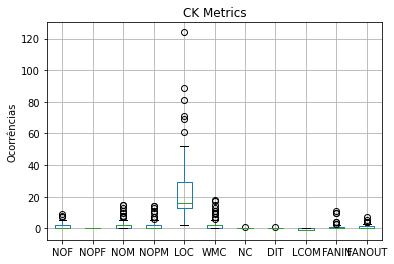

In [ ]:
typeMetricsDf.boxplot(column=['NOF', 'NOPF', 'NOM', 'NOPM', 'LOC', 'WMC', 'NC', 'DIT', 'LCOM', 'FANIN', 'FANOUT'], vert=True)
plt.title('CK Metrics')
plt.ylabel('Ocorrências')
plt.show()

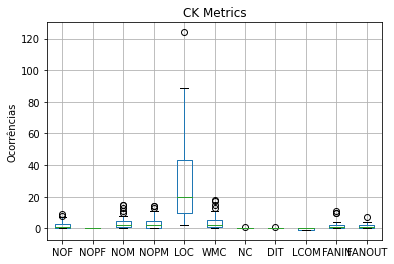

In [ ]:
filtered_df = typeMetricsDf[~typeMetricsDf['Type Name'].str.contains('Test', case=False)]
filtered_df.boxplot(column=['NOF', 'NOPF', 'NOM', 'NOPM', 'LOC', 'WMC', 'NC', 'DIT', 'LCOM', 'FANIN', 'FANOUT'], vert=True)
plt.title('CK Metrics')
plt.ylabel('Ocorrências')
plt.show()

In [ ]:
typeMetricsDf['LCOM'].describe()

count    72.000000
mean     -0.497454
std       0.563288
min      -1.000000
25%      -1.000000
50%      -1.000000
75%       0.000000
max       0.500000
Name: LCOM, dtype: float64

In [ ]:
filtered_df = typeMetricsDf[~typeMetricsDf['Type Name'].str.contains('Test', case=False)]

mean_LOC = filtered_df.groupby('Type Name')['LOC'].mean()

sorted_classes = mean_LOC.sort_values(ascending=False).index[:10]

print(sorted_classes, mean_LOC[sorted_classes])

Index(['HandoraLogBuilder', 'Tema', 'PlanoDeEstudos', 'PlanoDeEstudosFactory',
       'HandoraLogBuilder.ProntoParaLogar', 'TemaRequest',
       'NovoPlanoDeEstudosRequest', 'AdicionaItensTemas',
       'AdicionaItensPlanodeEstudos', 'Link'],
      dtype='object', name='Type Name') Type Name
HandoraLogBuilder                    124.0
Tema                                  89.0
PlanoDeEstudos                        81.0
PlanoDeEstudosFactory                 71.0
HandoraLogBuilder.ProntoParaLogar     69.0
TemaRequest                           52.0
NovoPlanoDeEstudosRequest             48.0
AdicionaItensTemas                    46.0
AdicionaItensPlanodeEstudos           46.0
Link                                  45.0
Name: LOC, dtype: float64


In [ ]:
typeMetricsDf.corr()

,NOF,NOPF,NOM,NOPM,LOC,WMC,NC,DIT,LCOM,FANIN,FANOUT,Line no
NOF,1.000000,NaN,0.743158,0.705109,0.624301,0.741010,-0.083822,0.403870,0.743430,0.397150,0.313962,0.061300
NOPF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOM,0.743158,NaN,1.000000,0.961678,0.627838,0.989596,-0.050381,0.428712,0.619649,0.453552,0.264996,-0.093864
NOPM,0.705109,NaN,0.961678,1.000000,0.608734,0.961442,-0.065743,0.421531,0.520445,0.472997,0.177972,-0.077887
LOC,0.624301,NaN,0.627838,0.608734,1.000000,0.616080,-0.094874,0.349325,0.399608,0.319487,0.133367,-0.004126
WMC,0.741010,NaN,0.989596,0.961442,0.616080,1.000000,-0.051406,0.436350,0.617007,0.472795,0.222082,-0.086895
NC,-0.083822,NaN,-0.050381,-0.065743,-0.094874,-0.051406,1.000000,-0.014085,-0.106624,0.002273,0.003394,-0.065202
DIT,0.403870,NaN,0.428712,0.421531,0.349325,0.436350,-0.014085,1.000000,0.204554,0.111359,0.003394,0.015460
LCOM,0.743430,NaN,0.619649,0.520445,0.399608,0.617007,-0.106624,0.204554,1.000000,0.284043,0.446783,-0.143691
FANIN,0.397150,NaN,0.453552,0.472997,0.319487,0.472795,0.002273,0.111359,0.284043,1.000000,-0.035592,-0.101702


([<matplotlib.axis.YTick at 0x7f1c9efdda90>,
 [Text(0, 0, 'NOF'),
  Text(0, 1, 'NOPF'),
  Text(0, 2, 'NOM'),
  Text(0, 3, 'NOPM'),
  Text(0, 4, 'LOC'),
  Text(0, 5, 'WMC'),
  Text(0, 6, 'NC'),
  Text(0, 7, 'DIT'),
  Text(0, 8, 'LCOM'),
  Text(0, 9, 'FANIN'),
  Text(0, 10, 'FANOUT'),
  Text(0, 11, 'Line no')])

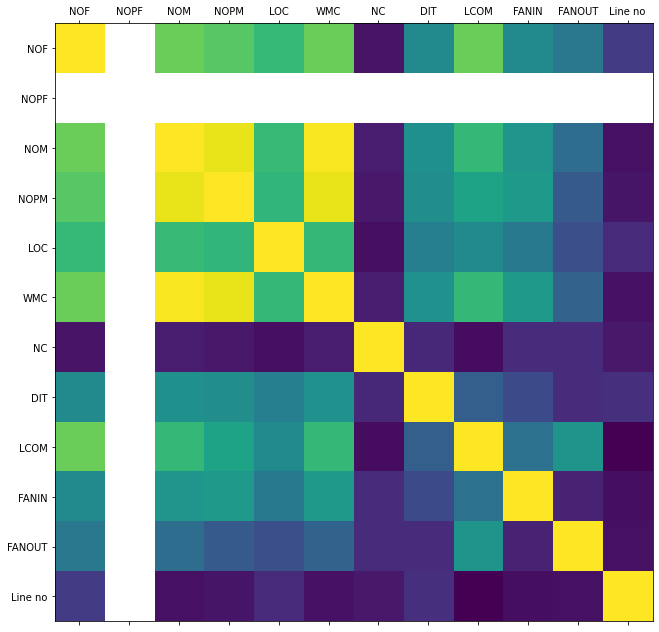

In [ ]:
corr = typeMetricsDf.corr()  
fig, ax = plt.subplots(figsize=(11, 11))
ax.matshow(corr) 
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns) 

**Métricas dos Métodos**

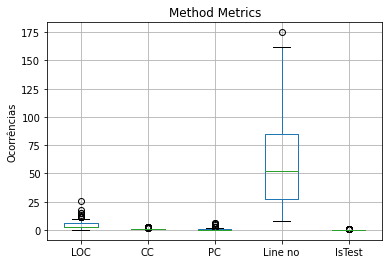

In [ ]:
methodMetricsDf.boxplot(column=['LOC','CC','PC','Line no','IsTest'], vert=True)
plt.title('Method Metrics')
plt.ylabel('Ocorrências')
plt.show()

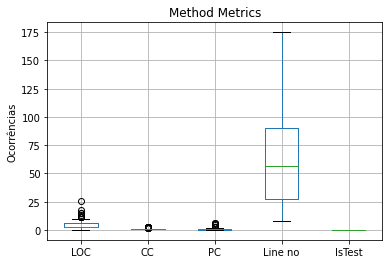

In [ ]:
filtered_df = methodMetricsDf[~methodMetricsDf['Type Name'].str.contains('Test', case=False)]
filtered_df.boxplot(column=['LOC','CC','PC','Line no','IsTest'], vert=True)
plt.title('Method Metrics')
plt.ylabel('Ocorrências')
plt.show()

In [ ]:
methodMetricsDf.describe(include='all').loc[['top']]

,Project Name,Package Name,Type Name,Method Name,LOC,CC,PC,Line no,IsTest,Main prod class tested,Production classes tested
top,handora-plano-de-estudos-main,br.com.zup.handora.planodeestudos.plano,Tema,hashCode,NaN,NaN,NaN,NaN,NaN,br.com.zup.handora.planodeestudos.utils.PlanoD...,br.com.zup.handora.planodeestudos.compartilhad...


In [ ]:
methodMetricsDf['CC'].describe()

count    178.000000
mean       1.129213
std        0.463517
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: CC, dtype: float64

In [ ]:
methodMetricsDf['LOC'].corr(methodMetricsDf['PC'])

0.4415287123392008

In [ ]:
methodMetricsDf.corr()

,LOC,CC,PC,Line no,IsTest
LOC,1.000000,0.128840,0.441529,-0.167261,0.241176
CC,0.128840,1.000000,0.111539,-0.023706,-0.099461
PC,0.441529,0.111539,1.000000,-0.284189,-0.242910
Line no,-0.167261,-0.023706,-0.284189,1.000000,-0.143892
IsTest,0.241176,-0.099461,-0.242910,-0.143892,1.000000


([<matplotlib.axis.YTick at 0x7f1c9ef79e80>,
 [Text(0, 0, 'LOC'),
  Text(0, 1, 'CC'),
  Text(0, 2, 'PC'),
  Text(0, 3, 'Line no'),
  Text(0, 4, 'IsTest')])

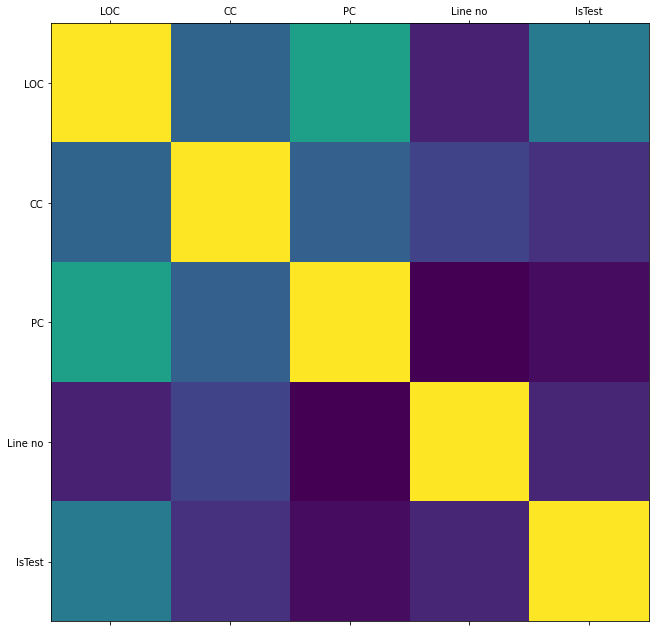

In [ ]:
corr = methodMetricsDf.corr()
fig, ax = plt.subplots(figsize=(11, 11))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

### Smells de Implementação

* Abstract Function Call From Constructor
* Complex Conditional
* Complex Method
* Empty catch clause
* Long Identifier
* Long Method
* Long Parameter List
* Long Statement
* Magic Number
* Missing default

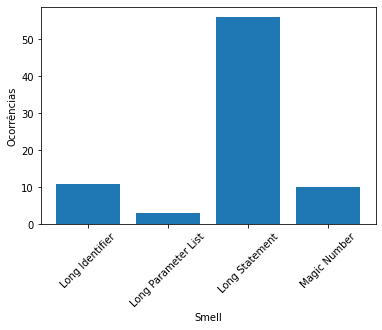

In [ ]:
counts = implementationDf['Implementation Smell'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel('Smell')
plt.xticks(rotation=45)
plt.ylabel('Ocorrências')
plt.show()

In [ ]:
pd.crosstab(implementationDf['Type Name'],implementationDf['Implementation Smell'])

Implementation Smell,Long Identifier,Long Parameter List,Long Statement,Magic Number
Type Name,,,,
AdicionaItensPlanodeEstudos,0,0,4,0
AdicionaItensTemas,1,0,6,0
Aluno,0,0,2,0
AlunoPodeAcessarOPlanoDeEstudosTest,2,0,1,0
CampoUnicoValidator,0,0,2,0
DadosDoPlanoResumidoController,0,0,1,1
DadosDoPlanoResumidoControllerTest,0,0,3,0
DetalhesDoPlanoDeEstudosController,3,0,2,0
DetalhesDoPlanoDeEstudosControllerTest,0,0,3,0


### Smells de Arquitetura

* Cyclic Dependency: This smell arises when two or more architecture components depend on each other directly or indirectly.
* Unstable Dependency: This smell arises when a component depends on other components that are less stable than itself.
* Ambiguous Interface: This smell arises when a component offers only a single, general entry-point into the component.
* God Component: This smell occurs when a component is excessively large either in the terms of LOC or number of classes.
* Feature Concentration: This smell occurs when a component realizes more than one architectural concern/feature.
* Scattered Functionality: This smell arises when multiple components are responsible for realizing the same high-level concern.
* Dense Structure: This smell arises when components have excessive and dense dependencies without any particular structure.

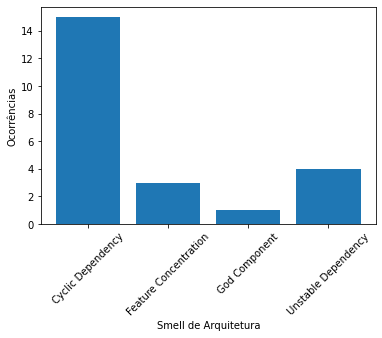

In [ ]:
counts = architectureDf['Architecture Smell'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel('Smell de Arquitetura')
plt.xticks(rotation=45)
plt.ylabel('Ocorrências')
plt.show()

In [ ]:
pd.crosstab(architectureDf['Package Name'],architectureDf['Architecture Smell'])

Architecture Smell,Cyclic Dependency,Feature Concentration,God Component,Unstable Dependency
Package Name,,,,
br.com.zup.handora.planodeestudos.alunos,3,1,0,1
br.com.zup.handora.planodeestudos.clientes.indexador,2,0,0,0
br.com.zup.handora.planodeestudos.compartilhado,0,1,0,0
br.com.zup.handora.planodeestudos.plano,3,1,1,1
br.com.zup.handora.planodeestudos.plano.partials.plano,2,0,0,1
br.com.zup.handora.planodeestudos.plano.partials.tema,3,0,0,1
br.com.zup.handora.planodeestudos.utils,2,0,0,0


### Smells de Teste

* Assertion roulette
* Conditional test logic
* Constructor initialization
* Eager test
* Empty test
* Exception handling
* Ignored test
* Unknown test

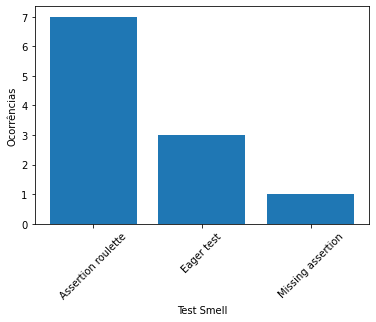

In [ ]:
counts = testDf['Test Smell'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel('Test Smell')
plt.xticks(rotation=45)
plt.ylabel('Ocorrências')
plt.show()

In [ ]:
pd.crosstab(testDf['Type Name'],testDf['Test Smell'])

Test Smell,Assertion roulette,Eager test,Missing assertion
Type Name,,,
AlunoPodeAcessarOPlanoDeEstudosTest,2,0,0
IndexaPlanoDeEstudosTest,0,0,1
InscricaoPlanoControllerTest,1,1,0
NovoPlanoDeEstudosControllerTest,2,0,0
RegistraAlunoTest,2,2,0


### Smells de Testabilidade

* Hard-wired dependencies
* Global state
* Excessive dependency
* Law of Demeter violation

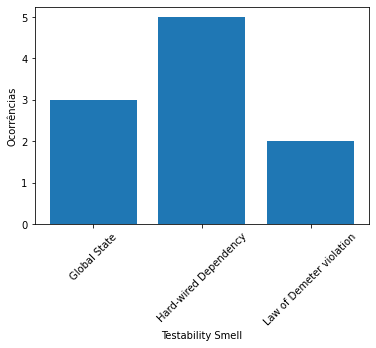

In [ ]:
counts = testabilityDf['Testability Smell'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel('Testability Smell')
plt.xticks(rotation=45)
plt.ylabel('Ocorrências')
plt.show()

In [ ]:
pd.crosstab(testabilityDf['Type Name'],testabilityDf['Testability Smell'])

Testability Smell,Global State,Hard-wired Dependency,Law of Demeter violation
Type Name,,,
Aluno,0,1,0
HandoraLogBuilder.Metodo,1,0,0
HandoraLogBuilder.OQueEstaAcontecendo,1,0,0
HandoraLogBuilder.ProntoParaLogar,1,0,0
NovoPlanoDeEstudosRequest,0,1,0
PlanoDeEstudosFactory,0,1,2
TemaRequest,0,1,0
ValidationErrorHandler,0,1,0


### Smells de Design

* Abstraction Design Smells: Imperative Abstraction, Unnecessary Abstraction, Multifaceted Abstraction, Unutilized Abstraction, Feature Envy.
* Encapsulation Design Smells: Deficient Encapsulation, Unexploited Encapsulation.
* Modularization Design Smells: Broken Modularization, Insufficient Modularization, Hub-like Modularization, Cyclically-dependent Modularization.
* Hierarchy Design Smells: Wide Hierarchy, Deep Hierarchy, Multipath Hierarchy, Cyclic Hierarchy, Rebellious Hierarchy, Missing Hierarchy, Broken Hierarchy.

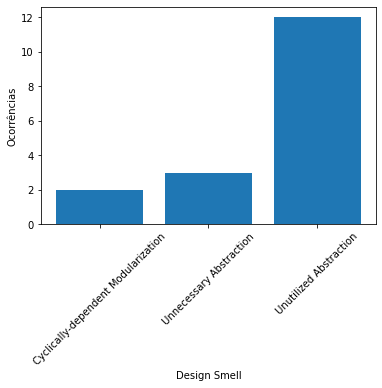

In [ ]:
counts = designDf['Design Smell'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel('Design Smell')
plt.xticks(rotation=45)
plt.ylabel('Ocorrências')
plt.show()

In [ ]:
pd.crosstab(designDf['Type Name'],designDf['Design Smell'])

Design Smell,Cyclically-dependent Modularization,Unnecessary Abstraction,Unutilized Abstraction
Type Name,,,
AdicionaItensPlanodeEstudos,0,0,1
AdicionaItensTemas,0,0,1
Aluno,1,0,0
BearerTokenToStringConverter,0,0,1
CampoUnicoValidator,0,0,1
CorsConfiguration,0,0,1
FeignConfig,0,0,1
HandoraLogBuilder.Metodo,0,1,1
HandoraLogBuilder.OQueEstaAcontecendo,0,1,1


## Mensuração, Avaliação e Recomendação

In [ ]:
methodMetricsDf['Package Name'].value_counts()

br.com.zup.handora.planodeestudos.plano                      76
br.com.zup.handora.planodeestudos.compartilhado              27
br.com.zup.handora.planodeestudos.plano.partials.tema        19
br.com.zup.handora.planodeestudos.plano.partials.plano       18
br.com.zup.handora.planodeestudos.alunos                     13
br.com.zup.handora.planodeestudos.utils                      13
br.com.zup.handora.planodeestudos.clientes                    6
br.com.zup.handora.planodeestudos.clientes.indexador          3
br.com.zup.handora.planodeestudos.compartilhado.seguranca     2
br.com.zup.handora.planodeestudos                             1
Name: Package Name, dtype: int64

In [ ]:
packageTotal = methodMetricsDf['Package Name'].nunique()
packageTotal

10

In [ ]:
methodMetricsDf['Type Name'].value_counts()

Tema                                      15
PlanoDeEstudos                            15
PlanoDeEstudosFactory                     13
TemaRequest                               11
NovoPlanoDeEstudosRequest                 10
Link                                       8
Aluno                                      8
Inscricao                                  7
ValidationErrorHandler                     7
TextoOrdenado                              7
ValidationErrorsOutputDto                  5
FieldErrorOutputDto                        4
AdicionaItensTemas                         4
BearerToken                                4
AdicionaItensPlanodeEstudos                3
NovoPlanoDeEstudosControllerTest           3
InscricaoPlanoControllerTest               3
RegistraAlunoTest                          2
PlanosSeguidosPeloAlunoControllerTest      2
NovoPlanoDeEstudosController               2
IndexaPlanoDeEstudosTest                   2
DetalhesDoTemaControllerTest               2
DetalhesDo

In [ ]:
classTotal = methodMetricsDf['Type Name'].nunique()
classTotal

48

In [ ]:
methodMetricsDf['Method Name'].value_counts()

hashCode                            8
equals                              8
teste1                              7
teste2                              7
executa                             5
                                   ..
desserializa                        1
handleResponseStatusException       1
handleGenericException              1
findByAlunoIdAndPlanoDeEstudosId    1
criaAluno                           1
Name: Method Name, Length: 108, dtype: int64

In [ ]:
methodTotal = methodMetricsDf['Method Name'].nunique()
methodTotal

108

In [ ]:
#TO-DO: Muitos smells em um método longo é tudo bem, considerar isso depois
#Excluir métodos que não agregam valor (muito parecidos)
def calcMeasurement(total, affected, adjustment):
  affected_adjustment = affected + (adjustment/total)
  percent = (affected_adjustment*100)/total
  print(percent)
  if(percent <= 20):
    result = 5
  elif (percent <= 40):
    result = 4
  elif (percent <= 60):
    result = 3
  elif (percent <= 80):
    result = 2
  else:
    result = 1

  return result

### Smells de Implementação

In [ ]:
implementationDf['Package Name'].nunique()

8

In [ ]:
implementationDf['Type Name'].nunique()

26

In [ ]:
totalImplementationSmellMethod = implementationDf['Method Name'].nunique()
totalImplementationSmellMethod

33

In [ ]:
implementationDf['Method Name'].value_counts()

teste1                                                 13
teste2                                                 10
adicionaFormasVerificacaoConhecimento                   5
adicionaFormasValidacaoConhecimento                     4
teste3                                                  3
detalhesDoTema                                          3
executa                                                 3
novoPlanoDeEstudos                                      3
seInscreve                                              3
detalhes                                                3
NovoPlanoDeEstudosRequest                               2
DetalhesDoTemaController                                2
adicionaDadosOrdenados                                  2
DetalhesDoPlanoDeEstudosController                      2
resumo                                                  2
criaNovoPlanoDeEstudosRequest                           2
isValid                                                 2
Tema          

In [ ]:
implementationDf['Implementation Smell'].value_counts()

Long Statement         56
Long Identifier        11
Magic Number           10
Long Parameter List     3
Name: Implementation Smell, dtype: int64

In [ ]:
totalImplementationSmell = implementationDf['Implementation Smell'].value_counts().sum()
totalImplementationSmell

80

In [ ]:
implementationSmellMeasurement = calcMeasurement(methodTotal,totalImplementationSmellMethod,totalImplementationSmell)
implementationSmellMeasurement

31.24142661179698


4

In [ ]:
implementationSmellDetected = implementationDf['Implementation Smell'].unique()
implementationSmellDetected

array(['Long Statement', 'Magic Number', 'Long Identifier',
       'Long Parameter List'], dtype=object)

In [ ]:
explanationImplementation ={
  "Abstract Function Call From Constructor": "Chamadas de funções abstratas dentro do construtor podem levar a problemas de design, pois o comportamento da função abstrata pode depender dos dados que só estão disponíveis após a conclusão da inicialização do objeto.",
  "Complex Conditional": "Condicionais complexos com muitas expressões lógicas e operadores podem tornar o código difícil de entender e manter, além de aumentar a probabilidade de erros.",
  "Complex Method": "Métodos complexos com muitas linhas de código, muitos desvios condicionais e muitos blocos aninhados podem tornar o código difícil de entender e manter, além de aumentar a probabilidade de erros.",
  "Empty catch clause": "Cláusulas vazias de catch não fazem nada quando ocorre uma exceção e podem dificultar a depuração do código.",
  "Long Identifier": "Identificadores longos podem ser difíceis de ler e escrever, e podem dificultar a manutenção do código.",
  "Long Method": "Métodos longos com muitas linhas de código, muitos desvios condicionais e muitos blocos aninhados podem tornar o código difícil de entender e manter, além de aumentar a probabilidade de erros.",
  "Long Parameter List": "Listas de parâmetros longas com muitos argumentos podem tornar o código difícil de entender e manter, além de aumentar a probabilidade de erros.",
  "Long Statement": "Declarações longas com muitas expressões podem tornar o código difícil de entender e manter, além de aumentar a probabilidade de erros.",
  "Magic Number": "Números mágicos são valores literais usados diretamente no código, o que pode tornar o código difícil de entender e manter, além de aumentar a probabilidade de erros.",
  "Missing default": "Falta de uma cláusula padrão em uma instrução switch pode levar a erros quando o valor de entrada não corresponde a nenhum dos casos.",
}

In [ ]:
explanationImplementationFinal = {}
for chave, valor in explanationImplementation.items():
    if chave in implementationSmellDetected:
        explanationImplementationFinal[chave] = valor
explanationImplementationFinal

{'Long Identifier': 'Identificadores longos podem ser difíceis de ler e escrever, e podem dificultar a manutenção do código.',
 'Long Parameter List': 'Listas de parâmetros longas com muitos argumentos podem tornar o código difícil de entender e manter, além de aumentar a probabilidade de erros.',
 'Long Statement': 'Declarações longas com muitas expressões podem tornar o código difícil de entender e manter, além de aumentar a probabilidade de erros.',
 'Magic Number': 'Números mágicos são valores literais usados diretamente no código, o que pode tornar o código difícil de entender e manter, além de aumentar a probabilidade de erros.'}

In [ ]:
recommendImplementation = {
  "Abstract Function Call From Constructor": "Evite chamar funções abstratas de dentro de construtores. Considere usar métodos de inicialização em vez disso.",
  "Complex Conditional": "Tente quebrar condicionais complexos em condições menores, usando variáveis auxiliares e/ou funções.",
  "Complex Method": "Divida métodos grandes e complexos em métodos menores e mais simples. Considere usar funções para extrair trechos de código repetitivos.",
  "Empty catch clause": "Evite usar cláusulas 'catch' vazias. Se você não pode lidar com a exceção adequadamente, é melhor deixar a exceção passar e propagá-la para um nível superior.",
  "Long Identifier": "Tente manter os identificadores de variáveis, métodos e classes curtos e descritivos. Evite usar abreviações obscuras ou nomes muito genéricos.",
  "Long Method": "Divida métodos grandes e complexos em métodos menores e mais simples. Considere usar funções para extrair trechos de código repetitivos.",
  "Long Parameter List": "Evite métodos com muitos parâmetros. Considere agrupá-los em estruturas de dados (como dicionários ou tuplas) ou usar parâmetros opcionais.",
  "Long Statement": "Evite instruções muito longas e complexas. Considere dividir as instruções em instruções menores ou usar variáveis auxiliares para tornar o código mais legível.",
  "Magic Number": "Evite usar números mágicos (números literais em código). Em vez disso, atribua esses valores a constantes descritivas e use essas constantes em todo o código.",
  "Missing default": "Sempre forneça uma cláusula 'default' em instruções 'switch' ou 'case', para lidar com casos inesperados."
}

In [ ]:
recommendImplementationFinal = {}
for chave, valor in recommendImplementation.items():
    if chave in implementationSmellDetected:
        recommendImplementationFinal[chave] = valor
recommendImplementationFinal

{'Long Identifier': 'Tente manter os identificadores de variáveis, métodos e classes curtos e descritivos. Evite usar abreviações obscuras ou nomes muito genéricos.',
 'Long Parameter List': 'Evite métodos com muitos parâmetros. Considere agrupá-los em estruturas de dados (como dicionários ou tuplas) ou usar parâmetros opcionais.',
 'Long Statement': 'Evite instruções muito longas e complexas. Considere dividir as instruções em instruções menores ou usar variáveis auxiliares para tornar o código mais legível.',
 'Magic Number': 'Evite usar números mágicos (números literais em código). Em vez disso, atribua esses valores a constantes descritivas e use essas constantes em todo o código.'}

In [ ]:
implementationDf['Cause of the Smell'].value_counts()

The length of the statement "mockMvc.perform(post("/" + planoDeEstudos.getId() + "/inscricao").with((jwt().jwt(jwt -> jwt.claim("email"`"aluno@email.com"))))).andExpect(status().isSeeOther()).andExpect(header().exists("Location"));" is 202.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

### Smells de Arquitetura

In [ ]:
totalArchitectureSmellPackage = architectureDf['Package Name'].nunique()
totalArchitectureSmellPackage

7

In [ ]:
totalArchitectureSmell = architectureDf['Architecture Smell'].value_counts().sum()
totalArchitectureSmell

23

In [ ]:
architectureSmellMeasurement = calcMeasurement(packageTotal,totalArchitectureSmellPackage,totalArchitectureSmell)
architectureSmellMeasurement

93.00000000000001


1

In [ ]:
architectureDf['Architecture Smell'].value_counts()

Cyclic Dependency        15
Unstable Dependency       4
Feature Concentration     3
God Component             1
Name: Architecture Smell, dtype: int64

In [ ]:
architectureSmellDetected = architectureDf['Architecture Smell'].unique()
architectureSmellDetected

array(['Cyclic Dependency', 'Unstable Dependency',
       'Feature Concentration', 'God Component'], dtype=object)

In [ ]:
explanationArchitecture = {
"Cyclic Dependency": "Ocorre quando dois ou mais módulos ou componentes dependem um do outro em um loop, tornando difícil a compreensão e manutenção do sistema.",
"Unstable Dependency": "Ocorre quando um módulo depende de outro módulo que é instável e passível de mudanças frequentes, causando impacto negativo na estabilidade do sistema.",
"Ambiguous Interface": "Ocorre quando a interface de um módulo é mal definida, ambígua ou confusa, dificultando seu uso e entendimento pelos usuários.",
"God Component": "Ocorre quando um único componente do sistema é responsável por uma grande quantidade de funcionalidades, tornando-o complexo, difícil de testar e de manter.",
"Feature Concentration": "Ocorre quando um grupo de funcionalidades está concentrado em um único módulo ou componente, tornando-o sobrecarregado e dificultando a separação de responsabilidades.",
"Scattered Functionality": "Ocorre quando as funcionalidades de um sistema estão espalhadas por vários módulos ou componentes, tornando-o difícil de entender e de manter.",
"Dense Structure": "Ocorre quando a estrutura do sistema é complexa e confusa, com muitas camadas e interdependências, dificultando a compreensão e manutenção do sistema."
}

In [ ]:
explanationArchitectureFinal = {}
for chave, valor in explanationArchitecture.items():
    if chave in architectureSmellDetected:
        explanationArchitectureFinal[chave] = valor
explanationArchitectureFinal

{'Cyclic Dependency': 'Ocorre quando dois ou mais módulos ou componentes dependem um do outro em um loop, tornando difícil a compreensão e manutenção do sistema.',
 'Unstable Dependency': 'Ocorre quando um módulo depende de outro módulo que é instável e passível de mudanças frequentes, causando impacto negativo na estabilidade do sistema.',
 'God Component': 'Ocorre quando um único componente do sistema é responsável por uma grande quantidade de funcionalidades, tornando-o complexo, difícil de testar e de manter.',
 'Feature Concentration': 'Ocorre quando um grupo de funcionalidades está concentrado em um único módulo ou componente, tornando-o sobrecarregado e dificultando a separação de responsabilidades.'}

In [ ]:
recommendArchitecture = {
    "Cyclic Dependency": "Reorganize the code to avoid circular references. Consider using dependency injection or event-driven architecture.",
    "Unstable Dependency": "Reorganize the code to minimize dependencies on unstable components. Consider using interfaces or dependency inversion.",
    "Ambiguous Interface": "Clarify the interface of components to avoid misunderstandings and reduce the likelihood of future changes breaking the code.",
    "God Component": "Refactor the code to break down the god component into smaller, more specialized components. Consider using the single responsibility principle.",
    "Feature Concentration": "Refactor the code to distribute features across multiple components instead of having them concentrated in a few. Consider using the separation of concerns principle.",
    "Scattered Functionality": "Refactor the code to group related functionality into cohesive components. Consider using the cohesion principle.",
    "Dense Structure": "Refactor the code to reduce the complexity of the structure. Consider using modular design or layering."
}

In [ ]:
recommendArchitectureFinal = {}
for chave, valor in recommendArchitecture.items():
    if chave in architectureSmellDetected:
        recommendArchitectureFinal[chave] = valor
recommendArchitectureFinal

{'Cyclic Dependency': 'Reorganize the code to avoid circular references. Consider using dependency injection or event-driven architecture.',
 'Unstable Dependency': 'Reorganize the code to minimize dependencies on unstable components. Consider using interfaces or dependency inversion.',
 'God Component': 'Refactor the code to break down the god component into smaller, more specialized components. Consider using the single responsibility principle.',
 'Feature Concentration': 'Refactor the code to distribute features across multiple components instead of having them concentrated in a few. Consider using the separation of concerns principle.'}

### Smells de Teste

In [ ]:
totalTestSmellMethod = testDf['Method Name'].nunique()
totalTestSmellMethod

6

In [ ]:
totalTestSmell = testDf['Test Smell'].value_counts().sum()
totalTestSmell

11

In [ ]:
#Pegando total de metodos de classes de teste
methodTotalFilteredtest = methodMetricsDf[methodMetricsDf['Type Name'].str.contains('Test', case=True)]
methodTotalFilteredtest = methodTotalFilteredtest['Method Name'].nunique()
methodTotalFilteredtest

8

In [ ]:
testSmellMeasurement = calcMeasurement(methodTotalFilteredtest,totalTestSmellMethod,totalTestSmell)
testSmellMeasurement

92.1875


1

In [ ]:
testDf['Test Smell'].value_counts()

Assertion roulette    7
Eager test            3
Missing assertion     1
Name: Test Smell, dtype: int64

In [ ]:
testSmellDetected = testDf['Test Smell'].unique()
testSmellDetected

array(['Assertion roulette', 'Eager test', 'Missing assertion'],
      dtype=object)

In [ ]:
explanationTest = {
"Assertion roulette": "Ocorre quando testes contêm muitas afirmações (assertions), tornando difícil determinar qual afirmação falhou em caso de falha de teste.",
"Conditional test logic": "Ocorre quando a lógica do teste é muito complexa, com muitas condições, o que dificulta a manutenção e a compreensão dos testes.",
"Constructor initialization": "Ocorre quando os testes usam construtores para inicializar objetos, o que pode tornar os testes mais lentos e difíceis de manter.",
"Eager test": "Ocorre quando os testes realizam muitas ações e verificam muitas coisas, o que torna os testes lentos e difíceis de manter.",
"Empty test": "Ocorre quando os testes não fazem nenhuma verificação ou validação, tornando-os inúteis para garantir a qualidade do software.",
"Exception handling": "Ocorre quando os testes não lidam com exceções (exceptions) adequadamente, tornando difícil determinar a causa de uma falha de teste.",
"Ignored test": "Ocorre quando os testes são ignorados (skipped) sem uma razão válida, o que pode levar a falhas não detectadas no software.",
"Missing assertion": "Ocorre quando os testes não incluem afirmações (assertions) suficientes para verificar se o software está funcionando corretamente.",
"Unknown test": "Ocorre quando os testes não são nomeados adequadamente ou não possuem documentação, tornando difícil determinar o que o teste está verificando ou como ele funciona."
}

In [ ]:
explanationTestFinal = {}
for chave, valor in explanationTest.items():
    if chave in testSmellDetected:
        explanationTestFinal[chave] = valor
explanationTestFinal

{'Assertion roulette': 'Ocorre quando testes contêm muitas afirmações (assertions), tornando difícil determinar qual afirmação falhou em caso de falha de teste.',
 'Eager test': 'Ocorre quando os testes realizam muitas ações e verificam muitas coisas, o que torna os testes lentos e difíceis de manter.',
 'Missing assertion': 'Ocorre quando os testes não incluem afirmações (assertions) suficientes para verificar se o software está funcionando corretamente.'}

In [ ]:
recommendTest = {
    "Assertion roulette": "Rever o conjunto de asserções e eliminar as que não são necessárias, mantendo apenas aquelas que são essenciais para garantir a corretude do sistema.",
    "Conditional test logic": "Simplificar os testes para reduzir a complexidade da lógica de teste, evitando testes condicionais demais.",
    "Constructor initialization": "Verificar se a inicialização dos objetos está sendo feita corretamente no construtor e se é possível separar a inicialização em métodos auxiliares para tornar o construtor mais claro.",
    "Eager test": "Avaliar se todos os testes são necessários, considerando remover testes que cobrem funcionalidades pouco importantes ou que já foram testadas de outras formas.",
    "Empty test": "Eliminar os testes vazios e garantir que cada teste cubra pelo menos uma funcionalidade do sistema.",
    "Exception handling": "Garantir que as exceções sejam tratadas de forma correta e que o código esteja protegido contra possíveis erros ou comportamentos inesperados.",
    "Ignored test": "Remover os testes ignorados ou refatorá-los para que cubram um cenário real do sistema.",
    "Missing assertion": "Adicione uma ou mais declarações de assert no final do teste para verificar o resultado esperado. As declarações de assert devem ser cuidadosamente escritas para garantir que testem apenas o que é necessário e não deixem passar casos não previstos.",
    "Unknown test": "Analisar os testes para verificar se estão cobrindo funcionalidades desconhecidas ou mal definidas e reescrever os testes para garantir que cubram apenas funcionalidades bem definidas."
}

In [ ]:
recommendTestFinal = {}
for chave, valor in recommendTest.items():
    if chave in testSmellDetected:
        recommendTestFinal[chave] = valor
recommendTestFinal

{'Assertion roulette': 'Rever o conjunto de asserções e eliminar as que não são necessárias, mantendo apenas aquelas que são essenciais para garantir a corretude do sistema.',
 'Eager test': 'Avaliar se todos os testes são necessários, considerando remover testes que cobrem funcionalidades pouco importantes ou que já foram testadas de outras formas.',
 'Missing assertion': 'Adicione uma ou mais declarações de assert no final do teste para verificar o resultado esperado. As declarações de assert devem ser cuidadosamente escritas para garantir que testem apenas o que é necessário e não deixem passar casos não previstos.'}

### Smells de Testabilidade

In [ ]:
totalTestabilitySmellClass = testabilityDf['Type Name'].nunique()
totalTestabilitySmellClass

8

In [ ]:
totalTestabilitySmell = testabilityDf['Testability Smell'].value_counts().sum()
totalTestabilitySmell

10

In [ ]:
testabilitySmellMeasurement = calcMeasurement(classTotal,totalTestabilitySmellClass,totalTestabilitySmell)
testabilitySmellMeasurement

17.100694444444446


5

In [ ]:
testabilityDf['Testability Smell'].value_counts()

Hard-wired Dependency       5
Global State                3
Law of Demeter violation    2
Name: Testability Smell, dtype: int64

In [ ]:
testabilitySmellDetected = testabilityDf['Testability Smell'].unique()
testabilitySmellDetected

array(['Hard-wired Dependency', 'Global State',
       'Law of Demeter violation'], dtype=object)

In [ ]:
explanationTestability = {
"Hard-wired Dependency": "Ocorre quando um objeto faz referência direta a um objeto específico em vez de depender de uma abstração, o que dificulta a substituição de componentes e torna o código menos flexível.",
"Global State": "Ocorre quando variáveis globais são usadas em diferentes partes do código, tornando difícil rastrear onde essas variáveis são alteradas e dificultando a manutenção do código.",
"Excessive dependency": "Ocorre quando uma classe tem muitas dependências de outras classes, tornando o acoplamento entre as classes muito forte e difícil de gerenciar.",
"Law of Demeter violation": "Ocorre quando uma classe interage com muitas outras classes e não segue o princípio da Lei de Demeter, o que torna o código mais complexo e difícil de entender, além de aumentar o acoplamento entre as classes." 
}

In [ ]:
explanationTestabilityFinal = {}
for chave, valor in explanationTestability.items():
    if chave in testabilitySmellDetected:
        explanationTestabilityFinal[chave] = valor
explanationTestabilityFinal

{'Hard-wired Dependency': 'Ocorre quando um objeto faz referência direta a um objeto específico em vez de depender de uma abstração, o que dificulta a substituição de componentes e torna o código menos flexível.',
 'Global State': 'Ocorre quando variáveis globais são usadas em diferentes partes do código, tornando difícil rastrear onde essas variáveis são alteradas e dificultando a manutenção do código.',
 'Law of Demeter violation': 'Ocorre quando uma classe interage com muitas outras classes e não segue o princípio da Lei de Demeter, o que torna o código mais complexo e difícil de entender, além de aumentar o acoplamento entre as classes.'}

In [ ]:
recommendTestability = {
  "Hard-wired Dependency": "Use dependency injection to decouple dependencies and make them easier to mock in tests.",
  "Global State": "Reduce or eliminate the use of global variables to make code more modular and testable.",
  "Excessive dependency": "Identify and remove unnecessary dependencies to reduce the complexity of the code and make it easier to test.",
  "Law of Demeter violation": "Use the Law of Demeter (LoD) principle to minimize the coupling between objects and make code more modular and testable."
}

In [ ]:
recommendTestabilityFinal = {}
for chave, valor in recommendTestability.items():
    if chave in testabilitySmellDetected:
        recommendTestabilityFinal[chave] = valor
recommendTestabilityFinal

{'Hard-wired Dependency': 'Use dependency injection to decouple dependencies and make them easier to mock in tests.',
 'Global State': 'Reduce or eliminate the use of global variables to make code more modular and testable.',
 'Law of Demeter violation': 'Use the Law of Demeter (LoD) principle to minimize the coupling between objects and make code more modular and testable.'}

### Smells de Design

In [ ]:
totalDesignSmellClass = designDf['Type Name'].nunique()
totalDesignSmellClass

14

In [ ]:
totalDesignSmell = designDf['Design Smell'].value_counts().sum()
totalDesignSmell

17

In [ ]:
designSmellMeasurement = calcMeasurement(classTotal,totalDesignSmellClass,totalDesignSmell)
designSmellMeasurement

29.904513888888886


4

In [ ]:
designDf['Design Smell'].value_counts()

Unutilized Abstraction                 12
Unnecessary Abstraction                 3
Cyclically-dependent Modularization     2
Name: Design Smell, dtype: int64

In [ ]:
designSmellDetected = designDf['Design Smell'].unique()
designSmellDetected

array(['Cyclically-dependent Modularization', 'Unutilized Abstraction',
       'Unnecessary Abstraction'], dtype=object)

In [ ]:
explanationDesign = {
"Imperative Abstraction": "ocorre quando uma abstração é mal projetada, possuindo comandos imperativos ou instruções condicionais.",
"Unnecessary Abstraction": "ocorre quando uma abstração é criada sem que haja uma necessidade real de existir.",
"Multifaceted Abstraction": "ocorre quando uma abstração é utilizada para representar mais de um conceito, tornando seu uso confuso e desorganizado.",
"Unutilized Abstraction": "ocorre quando uma abstração é criada, mas não é utilizada em nenhum lugar do código.",
"Feature Envy": "ocorre quando um método ou classe utiliza excessivamente os dados ou comportamentos de outra classe, indicando que deveria pertencer à classe que utiliza.",
"Deficient Encapsulation": "ocorre quando a estrutura interna de uma classe é acessível externamente, podendo levar a erros e dificuldades de manutenção.",
"Unexploited Encapsulation": "ocorre quando uma classe encapsula dados e comportamentos, mas não os utiliza ou expõe para uso externo, tornando a abstração inútil.",
"Broken Modularization": "ocorre quando o código é mal organizado em módulos, com responsabilidades mal definidas e interdependências excessivas.",
"Insufficient Modularization": "ocorre quando o código não é suficientemente modularizado, com um único módulo contendo muitas responsabilidades e comportamentos diferentes.",
"Hub-like Modularization": "ocorre quando um único módulo é responsável por conectar todos os outros módulos, tornando-se um ponto central de falhas e dificuldades de manutenção.",
"Cyclically-dependent Modularization": "ocorre quando os módulos possuem dependências circulares, tornando difícil entender a lógica e a ordem de execução do código.",
"Wide Hierarchy": "ocorre quando uma hierarquia de classes tem muitos níveis, dificultando a compreensão e manutenção do código.",
"Deep Hierarchy": "ocorre quando uma hierarquia de classes tem muitos subníveis, o que pode indicar um design inadequado ou excesso de responsabilidades em uma única classe.",
"Multipath Hierarchy": "ocorre quando há várias maneiras de acessar um mesmo comportamento ou dado em uma hierarquia de classes, o que pode levar a inconsistências e erros.",
"Cyclic Hierarchy": "ocorre quando há dependências circulares entre as classes em uma hierarquia, tornando difícil entender a ordem de execução do código e a lógica por trás dela.",
"Rebellious Hierarchy": "ocorre quando uma classe filha não segue a lógica ou responsabilidades esperadas da classe mãe, levando a um design inconsistente e difícil de entender.",
"Missing Hierarchy": "ocorre quando não há uma hierarquia clara de classes para representar a lógica do código, levando a um design caótico e difícil de entender.",
"Broken Hierarchy": "ocorre quando a hierarquia de classes não representa adequadamente a lógica do código, com classes deslocadas ou responsabilidades mal definidas."
}

In [ ]:
explanationDesignFinal = {}
for chave, valor in explanationDesign.items():
    if chave in designSmellDetected:
        explanationDesignFinal[chave] = valor
explanationDesignFinal

{'Unnecessary Abstraction': 'ocorre quando uma abstração é criada sem que haja uma necessidade real de existir.',
 'Unutilized Abstraction': 'ocorre quando uma abstração é criada, mas não é utilizada em nenhum lugar do código.',
 'Cyclically-dependent Modularization': 'ocorre quando os módulos possuem dependências circulares, tornando difícil entender a lógica e a ordem de execução do código.'}

In [ ]:
recommendDesign = {"Imperative Abstraction": "tente tornar suas abstrações mais declarativas e expressivas, evitando comandos imperativos ou instruções condicionais.",
"Unnecessary Abstraction": "remova qualquer abstração que não esteja fornecendo nenhum valor ou funcionalidade significativa.",
"Multifaceted Abstraction": "tente dividir abstrações complexas em abstrações menores e mais específicas que tenham apenas uma responsabilidade clara e bem definida.",
"Unutilized Abstraction": "remova qualquer abstração que não esteja sendo usada em seu código.",
"Feature Envy": "tente mover o código que depende excessivamente de outras classes para a classe que contém as informações necessárias.",
"Deficient Encapsulation": "tente proteger melhor as informações dentro de suas classes, evitando o acesso direto a variáveis de instância ou métodos.",
"Unexploited Encapsulation": "use as informações encapsuladas dentro de suas classes e evite o acesso direto a variáveis de instância ou métodos.",
"Broken Modularization": "tente dividir seu código em módulos menores e mais específicos que tenham apenas uma responsabilidade clara e bem definida.",
"Insufficient Modularization": "tente dividir seu código em módulos mais granulares que forneçam funcionalidade mais específica e reutilizável.",
"Hub-like Modularization": "tente dividir seu código em módulos mais equilibrados, sem depender de um único módulo centralizado para fornecer funcionalidade.",
"Cyclically-dependent Modularization": "evite dependências circulares entre módulos, tente reorganizar seu código para que os módulos dependam apenas de outros módulos mais primitivos.",
"Wide Hierarchy": "tente reduzir a largura da hierarquia de classes, limitando o número de subclasses diretas de uma classe base.",
"Deep Hierarchy": "tente reduzir a profundidade da hierarquia de classes, limitando o número de níveis que uma classe pode ter na hierarquia.",
"Multipath Hierarchy": "evite que uma classe tenha mais de um caminho para uma classe base, a menos que seja absolutamente necessário.",
"Cyclic Hierarchy": "evite que uma classe dependa diretamente de uma classe que depende diretamente dela.",
"Rebellious Hierarchy": "evite que uma classe substitua métodos que não deveria substituir, o que pode levar a comportamentos inesperados ou não desejados.",
"Missing Hierarchy": "considere adicionar uma hierarquia de classes se estiver lidando com comportamentos que variam com base em uma ou mais características específicas do objeto.",
"Broken Hierarchy": "tente corrigir qualquer problema que esteja causando problemas com a hierarquia de classes."
}

In [ ]:
recommendDesignFinal = {}
for chave, valor in recommendDesign.items():
    if chave in designSmellDetected:
        recommendDesignFinal[chave] = valor
recommendDesignFinal

{'Unnecessary Abstraction': 'remova qualquer abstração que não esteja fornecendo nenhum valor ou funcionalidade significativa.',
 'Unutilized Abstraction': 'remova qualquer abstração que não esteja sendo usada em seu código.',
 'Cyclically-dependent Modularization': 'evite dependências circulares entre módulos, tente reorganizar seu código para que os módulos dependam apenas de outros módulos mais primitivos.'}

## TO-DO: Fazer para Segurança e SAD

### Visão do Projeto

In [ ]:
measurements = [implementationSmellMeasurement, architectureSmellMeasurement, testSmellMeasurement, testabilitySmellMeasurement, designSmellMeasurement]
projectMeasurement = sum(measurements)/len(measurements)
projectMeasurement

3.0

In [ ]:
projectEvaluation = np.concatenate((implementationSmellDetected, architectureSmellDetected, testSmellDetected, testabilitySmellDetected, designSmellDetected))
projectEvaluation

array(['Long Statement', 'Magic Number', 'Long Identifier',
       'Long Parameter List', 'Cyclic Dependency', 'Unstable Dependency',
       'Feature Concentration', 'God Component', 'Assertion roulette',
       'Eager test', 'Missing assertion', 'Hard-wired Dependency',
       'Global State', 'Law of Demeter violation',
       'Cyclically-dependent Modularization', 'Unutilized Abstraction',
       'Unnecessary Abstraction'], dtype=object)

In [ ]:
projectRecommend = {}
projectRecommend.update(recommendImplementationFinal)
projectRecommend.update(recommendArchitectureFinal)
projectRecommend.update(recommendTestFinal)
projectRecommend.update(recommendTestabilityFinal)
projectRecommend.update(recommendDesignFinal)
projectRecommend

{'Long Identifier': 'Tente manter os identificadores de variáveis, métodos e classes curtos e descritivos. Evite usar abreviações obscuras ou nomes muito genéricos.',
 'Long Parameter List': 'Evite métodos com muitos parâmetros. Considere agrupá-los em estruturas de dados (como dicionários ou tuplas) ou usar parâmetros opcionais.',
 'Long Statement': 'Evite instruções muito longas e complexas. Considere dividir as instruções em instruções menores ou usar variáveis auxiliares para tornar o código mais legível.',
 'Magic Number': 'Evite usar números mágicos (números literais em código). Em vez disso, atribua esses valores a constantes descritivas e use essas constantes em todo o código.',
 'Cyclic Dependency': 'Reorganize the code to avoid circular references. Consider using dependency injection or event-driven architecture.',
 'Unstable Dependency': 'Reorganize the code to minimize dependencies on unstable components. Consider using interfaces or dependency inversion.',
 'God Component'

## Exportar Relatório

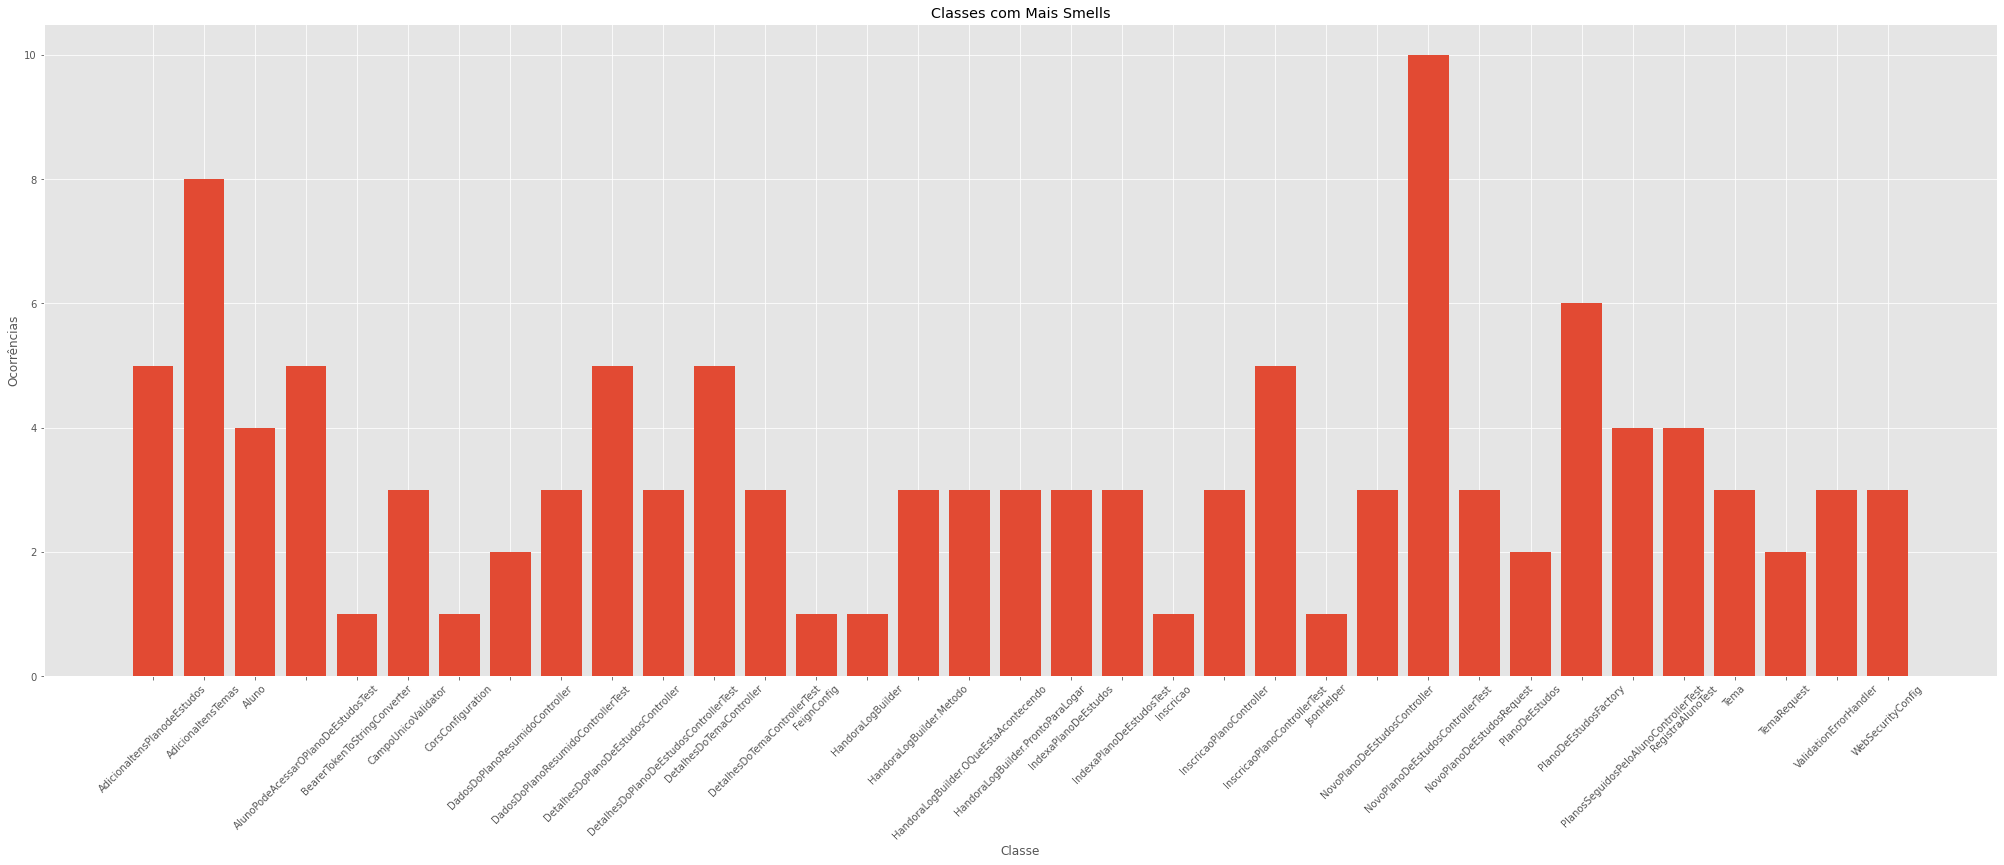

In [ ]:
counts = allSmellsDf['Type Name'].value_counts().sort_index()
plt.style.use("ggplot")
plt.figure(figsize = (35, 12))
plt.bar(counts.index, counts.values)
plt.xlabel('Classe')
plt.xticks(rotation=45)
plt.ylabel('Ocorrências')
plt.title("Classes com Mais Smells")
plt.savefig('/visaoclasses.png')
plt.show()

In [ ]:
!pip install python-docx

import pandas as pd
from docx import Document
from docx.shared import Inches

# Criar um documento Word
doc = Document()

# Adicionar um cabeçalho
doc.add_heading('Auditoria/Análise de Qualidade', 0)

doc.add_heading('Smells de Implementação', 1)
p = doc.add_paragraph('Nota: ' + str(implementationSmellMeasurement)).bold = True
p = doc.add_paragraph('Avaliação: ').bold = True
p = doc.add_paragraph(str(implementationDf['Implementation Smell'].value_counts())).bold = True
p = doc.add_paragraph('Recomendações: ' + str(recommendImplementationFinal)).bold = True

doc.add_heading('Smells de Arquitetura', 1)
p = doc.add_paragraph('Nota: ' + str(architectureSmellMeasurement)).bold = True
p = doc.add_paragraph('Avaliação: ').bold = True
p = doc.add_paragraph(str(architectureDf['Architecture Smell'].value_counts())).bold = True
p = doc.add_paragraph('Recomendações: ' + str(recommendArchitectureFinal)).bold = True

doc.add_heading('Smells de Teste', 1)
p = doc.add_paragraph('Nota: ' + str(testSmellMeasurement)).bold = True
p = doc.add_paragraph('Avaliação: ').bold = True
p = doc.add_paragraph(str(testDf['Test Smell'].value_counts())).bold = True
p = doc.add_paragraph('Recomendações: ' + str(recommendTestFinal)).bold = True

doc.add_heading('Smells de Testabilidade', 1)
p = doc.add_paragraph('Nota: ' + str(testabilitySmellMeasurement)).bold = True
p = doc.add_paragraph('Avaliação: ').bold = True
p = doc.add_paragraph(str(testabilityDf['Testability Smell'].value_counts())).bold = True
p = doc.add_paragraph('Recomendações: ' + str(recommendTestabilityFinal)).bold = True

doc.add_heading('Smells de Design', 1)
p = doc.add_paragraph('Nota: ' + str(designSmellMeasurement)).bold = True
p = doc.add_paragraph('Avaliação: ').bold = True
p = doc.add_paragraph(str(designDf['Design Smell'].value_counts())).bold = True
p = doc.add_paragraph('Recomendações: ' + str(recommendDesignFinal)).bold = True

doc.add_heading('Visão Geral do Projeto', 1)
p = doc.add_paragraph('Nota: ' + str(projectMeasurement)).bold = True
p = doc.add_paragraph('Avaliação: ').bold = True
p = doc.add_paragraph(str(projectEvaluation)).bold = True
p = doc.add_paragraph('Recomendações: ' + str(projectRecommend)).bold = True

doc.add_picture('/visaoclasses.png', width=Inches(2)) 

doc.add_heading('Evidências', 0)

# Adicionar uma tabela com os dados do dataframe
table = doc.add_table(rows=len(methodMetricsDf)+1, cols=len(methodMetricsDf.columns))
table.style = 'Table Grid'
# Adicionar o cabeçalho da tabela
for j in range(len(methodMetricsDf.columns)):
    table.cell(0,j).text = methodMetricsDf.columns[j]
# Adicionar os dados do dataframe
for i in range(len(methodMetricsDf)):
    for j in range(len(methodMetricsDf.columns)):
        table.cell(i+1,j).text = str(methodMetricsDf.values[i,j])

# Salvar o documento
doc.save('qualityReport.docx')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
resultExplanationDesign = ""
for key, value in explanationDesignFinal.items():
    resultExplanationDesign += str(key) + ": " + str(value) + " "

resultExplanationArchitecture = ""
for key, value in explanationArchitectureFinal.items():
    resultExplanationArchitecture += str(key) + ": " + str(value) + " "

resultExplanationTest = ""
for key, value in explanationTestFinal.items():
    resultExplanationTest += str(key) + ": " + str(value) + " "

resultExplanationTestability = ""
for key, value in explanationTestabilityFinal.items():
    resultExplanationTestability += str(key) + ": " + str(value) + " "

resultExplanationImplementation = ""
for key, value in explanationImplementationFinal.items():
    resultExplanationImplementation += str(key) + ": " + str(value) + " "

In [ ]:
resultRecommendDesign = ""
for key, value in recommendDesignFinal.items():
    resultRecommendDesign += str(key) + ": " + str(value) + " "

resultRecommendArchitecture = ""
for key, value in recommendArchitectureFinal.items():
    resultRecommendArchitecture += str(key) + ": " + str(value) + " "

resultRecommendTest = ""
for key, value in recommendTestFinal.items():
    resultRecommendTest += str(key) + ": " + str(value) + " "

resultRecommendTestability = ""
for key, value in recommendTestabilityFinal.items():
    resultRecommendTestability += str(key) + ": " + str(value) + " "

resultRecommendImplementation = ""
for key, value in recommendImplementationFinal.items():
    resultRecommendImplementation += str(key) + ": " + str(value) + " "

In [ ]:
projectName = architectureDf['Project Name'].values[0]

In [ ]:
implementationDfNew = implementationDf.drop(['Project Name', 'Package Name', 'Type Name', 'Cause of the Smell'], axis=1)
implementationDfNew

,Method Name,Implementation Smell,Method start line no
0,getPlanosSeguidos,Long Statement,63
1,criaInscricao,Long Statement,75
2,executa,Long Statement,29
3,executa,Long Statement,29
4,executa,Long Statement,29
...,...,...,...
78,compareTo,Long Statement,106
79,insereFormasVerificacaoConhecimento,Long Identifier,161
80,criaNovoPlanoDeEstudosRequest,Long Statement,62
81,criaNovoPlanoDeEstudosRequest,Long Statement,74


In [ ]:
testabilityDfNew = testabilityDf.drop(['Project Name', 'Package Name', 'Cause of the Smell'], axis=1)
testabilityDfNew

,Type Name,Testability Smell
0,Aluno,Hard-wired Dependency
2,HandoraLogBuilder.ProntoParaLogar,Global State
3,HandoraLogBuilder.OQueEstaAcontecendo,Global State
4,HandoraLogBuilder.Metodo,Global State
5,ValidationErrorHandler,Hard-wired Dependency
6,NovoPlanoDeEstudosRequest,Hard-wired Dependency
7,TemaRequest,Hard-wired Dependency
10,PlanoDeEstudosFactory,Hard-wired Dependency
11,PlanoDeEstudosFactory,Law of Demeter violation
13,PlanoDeEstudosFactory,Law of Demeter violation


In [ ]:
testDfNew = testDf.drop(['Project Name', 'Package Name', 'Type Name', 'Cause of the Smell'], axis=1)
testDfNew

,Method Name,Test Smell
0,test1,Assertion roulette
1,test1,Eager test
2,test2,Assertion roulette
3,test2,Eager test
4,teste1,Assertion roulette
5,teste2,Assertion roulette
12,teste1,Missing assertion
13,test,Assertion roulette
14,test,Eager test
15,teste1,Assertion roulette


In [ ]:
designDfnew = designDf.drop(['Project Name', 'Package Name', 'Cause of the Smell'], axis=1)
designDfnew

,Type Name,Design Smell
1,Aluno,Cyclically-dependent Modularization
6,BearerTokenToStringConverter,Unutilized Abstraction
7,FeignConfig,Unutilized Abstraction
8,CampoUnicoValidator,Unutilized Abstraction
9,CorsConfiguration,Unutilized Abstraction
10,HandoraLogBuilder.ProntoParaLogar,Unnecessary Abstraction
11,HandoraLogBuilder.ProntoParaLogar,Unutilized Abstraction
12,HandoraLogBuilder.OQueEstaAcontecendo,Unnecessary Abstraction
13,HandoraLogBuilder.OQueEstaAcontecendo,Unutilized Abstraction
14,HandoraLogBuilder.Metodo,Unnecessary Abstraction


In [ ]:
architectureDfNew = architectureDf.drop(['Project Name', 'Cause of the Smell'], axis=1)
architectureDfNew

,Package Name,Architecture Smell
0,br.com.zup.handora.planodeestudos.alunos,Cyclic Dependency
1,br.com.zup.handora.planodeestudos.alunos,Cyclic Dependency
2,br.com.zup.handora.planodeestudos.alunos,Cyclic Dependency
3,br.com.zup.handora.planodeestudos.alunos,Unstable Dependency
4,br.com.zup.handora.planodeestudos.alunos,Feature Concentration
5,br.com.zup.handora.planodeestudos.clientes.ind...,Cyclic Dependency
6,br.com.zup.handora.planodeestudos.clientes.ind...,Cyclic Dependency
7,br.com.zup.handora.planodeestudos.compartilhado,Feature Concentration
8,br.com.zup.handora.planodeestudos.plano,God Component
9,br.com.zup.handora.planodeestudos.plano,Cyclic Dependency


In [ ]:
!pip install python-docx

import pandas as pd
from docx import Document
from docx.shared import Inches

# Criar um documento Word
doc = Document()

# Adicionar um cabeçalho
doc.add_heading('Auditoria/Análise de Qualidade', 0)

p = doc.add_paragraph('Neste relatório apresentamos os resultados de um conjunto de análises de arquitetura, design de código, implementação, design de teste e testabilidade realizadas no repositório do projeto ' + str(projectName) + ".")

doc.add_heading('Nossa avaliação para cada critério', 1)

p = doc.add_paragraph('Aqui usamos uma escala de 1 a 5. 1 significa extrema pobreza no uso das práticas enquanto 5 fala com excelência.')

doc.add_heading('1. Nível de refinamento das heurísticas para tomada de decisão sobre detalhes do design do código', 2)
p = doc.add_paragraph('a. Nota: ' + str((designSmellMeasurement+architectureSmellMeasurement/2))).bold = True
p = doc.add_paragraph('b. Explicação: Quanto a aspectos de design de código, pode-se identicar: ' + str(resultExplanationDesign) + " Já em relação a aspectos de arquitetura se observou: " + str(resultExplanationArchitecture)).bold = True
p = doc.add_paragraph('c. Recomendações: Frente aos cenários de smells de design de código encontrados, recomenda-se: ' + str(resultRecommendDesign) + " Já em relação aos aspectos de arquitetura as recomendações são: " + str(resultRecommendArchitecture)).bold = True
p = doc.add_paragraph('d. Análise estática: ').bold = True

p = doc.add_paragraph('Smells de Design: ')
table = doc.add_table(rows=len(designDfnew)+1, cols=len(designDfnew.columns))
table.style = 'Table Grid'
for j in range(len(designDfnew.columns)):
    table.cell(0,j).text = designDfnew.columns[j]
for i in range(len(designDfnew)):
    for j in range(len(designDfnew.columns)):
        table.cell(i+1,j).text = str(designDfnew.values[i,j])

p = doc.add_paragraph('Smells de Arquitetura: ')
table = doc.add_table(rows=len(architectureDfNew)+1, cols=len(architectureDfNew.columns))
table.style = 'Table Grid'
for j in range(len(architectureDfNew.columns)):
    table.cell(0,j).text = architectureDfNew.columns[j]
for i in range(len(architectureDfNew)):
    for j in range(len(architectureDfNew.columns)):
        table.cell(i+1,j).text = str(architectureDfNew.values[i,j])

doc.add_heading('2. O quão revelador de bugs aquele código é', 2)
p = doc.add_paragraph('a. Nota: ' + str((testSmellMeasurement+testabilitySmellMeasurement/2))).bold = True
p = doc.add_paragraph('b. Explicação: Quanto a aspectos de design de testes, pode-se identicar: ' + str(resultExplanationTest) + " Já em relação a aspectos de testabilidade se observou: " + str(resultExplanationTestability)).bold = True
p = doc.add_paragraph('c. Recomendações: Frente aos cenários de smells de design de testes encontrados, recomenda-se: ' + str(resultRecommendTest)  + " Já em relação aos aspectos de testabilidade as recomendações são: " +  str(resultRecommendTestability)).bold = True
p = doc.add_paragraph('d. Análise estática: ').bold = True

p = doc.add_paragraph('Smells de Teste: ')
table = doc.add_table(rows=len(testDfNew)+1, cols=len(testDfNew.columns))
table.style = 'Table Grid'
for j in range(len(testDfNew.columns)):
    table.cell(0,j).text = testDfNew.columns[j]
for i in range(len(testDfNew)):
    for j in range(len(testDfNew.columns)):
        table.cell(i+1,j).text = str(testDfNew.values[i,j])

p = doc.add_paragraph('Smells de Testabilidade: ')
table = doc.add_table(rows=len(testabilityDfNew)+1, cols=len(testabilityDfNew.columns))
table.style = 'Table Grid'
for j in range(len(testabilityDfNew.columns)):
    table.cell(0,j).text = testabilityDfNew.columns[j]
for i in range(len(testabilityDfNew)):
    for j in range(len(testabilityDfNew.columns)):
        table.cell(i+1,j).text = str(testabilityDfNew.values[i,j])

doc.add_heading('3. Nível de facilidade de entendimento', 2)
p = doc.add_paragraph('a. Nota: ' + str(implementationSmellMeasurement)).bold = True
p = doc.add_paragraph('b. Explicação: Quanto a aspectos de implementação, pode-se identicar: ' + str(resultExplanationImplementation)).bold = True
p = doc.add_paragraph('c. Recomendações: Frente aos cenários de smells de implementação encontrados, recomenda-se: ' + str(resultRecommendImplementation)).bold = True
p = doc.add_paragraph('d. Análise estática: ').bold = True

p = doc.add_paragraph('Smells de Implementação: ')
table = doc.add_table(rows=len(implementationDfNew)+1, cols=len(implementationDfNew.columns))
table.style = 'Table Grid'
for j in range(len(implementationDfNew.columns)):
    table.cell(0,j).text = implementationDfNew.columns[j]
for i in range(len(implementationDfNew)):
    for j in range(len(implementationDfNew.columns)):
        table.cell(i+1,j).text = str(implementationDfNew.values[i,j])


# doc.add_picture('/visaoclasses.png', width=Inches(2)) 

# doc.add_heading('Evidências', 0)

# # Adicionar uma tabela com os dados do dataframe
# table = doc.add_table(rows=len(methodMetricsDf)+1, cols=len(methodMetricsDf.columns))
# table.style = 'Table Grid'
# # Adicionar o cabeçalho da tabela
# for j in range(len(methodMetricsDf.columns)):
#     table.cell(0,j).text = methodMetricsDf.columns[j]
# # Adicionar os dados do dataframe
# for i in range(len(methodMetricsDf)):
#     for j in range(len(methodMetricsDf.columns)):
#         table.cell(i+1,j).text = str(methodMetricsDf.values[i,j])

# Salvar o documento
doc.save('qualityReport.docx')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Classificador

In [ ]:
valores_aleatorios = np.random.randint(2, size=len(methodMetricsDf))
valores_aleatorios

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1])

In [ ]:
methodMetricsDf['smell'] = valores_aleatorios

In [ ]:
methodMetricsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Project Name               178 non-null    object
 1   Package Name               178 non-null    object
 2   Type Name                  178 non-null    object
 3   Method Name                178 non-null    object
 4   LOC                        178 non-null    int64 
 5   CC                         178 non-null    int64 
 6   PC                         178 non-null    int64 
 7   Line no                    178 non-null    int64 
 8   IsTest                     178 non-null    int64 
 9   Main prod class tested     46 non-null     object
 10  Production classes tested  46 non-null     object
 11  smell                      178 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 16.8+ KB


In [ ]:
x = methodMetricsDf[['LOC', 'CC', 'PC', 'Line no', 'IsTest']].copy()

In [ ]:
y= methodMetricsDf[['smell']].copy()

In [ ]:
print(x.shape)
print(y.shape)

(178, 5)
(178, 1)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.33, random_state=324)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 5)
(59, 5)
(119, 1)
(59, 1)


In [ ]:
quality_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)
quality_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)

In [ ]:
predictions = quality_classifier.predict(x_test)

In [ ]:
accuracy_score(y_true=y_test, y_pred=predictions)

0.423728813559322